# Read the data

#### EUROPEAN CLIMATE ASSESSMENT & DATASET (ECA&D), file created on 10-02-2023
THESE DATA CAN BE USED FREELY PROVIDED THAT THE FOLLOWING SOURCE IS ACKNOWLEDGED:
Data and metadata available at http://www.ecad.eu
FILE FORMAT (MISSING VALUE CODE IS -9999):

SOUID: Source identifier

DATE : Date YYYYMMDD

TG   : mean temperature in 0.1 &#176;C

Q_TG : Quality code for TG (0='valid'; 1='suspect'; 9='missing')

In [70]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [71]:
df = pd.read_csv('data.txt', sep=',', header = 'infer')
df.columns=['source','date','temp','qcode']
df['date']=pd.to_datetime(df['date'], format='%Y%m%d')

In [72]:
#Normalize the temperature
df['temp'] = df['temp'] * 0.1
df.head()

,source,date,temp,qcode
0,127488,1876-01-01,2.2,0
1,127488,1876-01-02,2.5,0
2,127488,1876-01-03,0.3,0
3,127488,1876-01-04,-5.8,0
4,127488,1876-01-05,-9.8,0


In [73]:
#Checking Null Values
df.isnull().sum()

source    0
date      0
temp      0
qcode     0
dtype: int64

In [74]:
#Suspected-Missing-Valid Temperature Values
sus = df[df['qcode']==1].count()
mis = df[df['qcode']==9].count()
valid = df[df['qcode']==0].count()
print(f'Suspected Values Count = {sus}')
print(f'Missing Values Count = {mis}')
print(f'Valid Values Count = {valid}')

Suspected Values Count = source    0
date      0
temp      0
qcode     0
dtype: int64
Missing Values Count = source    195
date      195
temp      195
qcode     195
dtype: int64
Valid Values Count = source    53496
date      53496
temp      53496
qcode     53496
dtype: int64


In [75]:
df.dtypes

source             int64
date      datetime64[ns]
temp             float64
qcode              int64
dtype: object

In [76]:
df[df['qcode']==9]

,source,date,temp,qcode
25316,127488,1945-04-25,-999.9,9
25317,127488,1945-04-26,-999.9,9
25318,127488,1945-04-27,-999.9,9
25319,127488,1945-04-28,-999.9,9
25320,127488,1945-04-29,-999.9,9
...,...,...,...,...
25506,127488,1945-11-01,-999.9,9
25507,127488,1945-11-02,-999.9,9
25508,127488,1945-11-03,-999.9,9
25509,127488,1945-11-04,-999.9,9


<AxesSubplot:xlabel='date'>

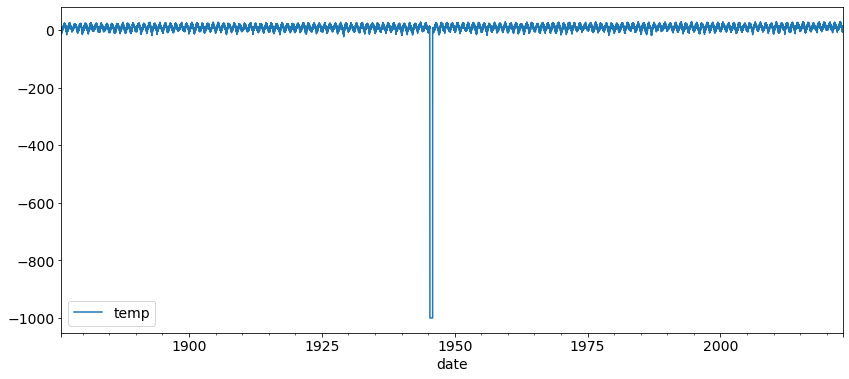

In [77]:
df.plot(x='date', y='temp')


###### It can be seen that there are some invalid values

In [78]:
#Missing Value data range from these dates
min = df.date[df['qcode']==9].min()
max = df.date[df['qcode']==9].min()
print(f'Starting date {min}')
print(f'Ending date {max}')

Starting date 1945-04-25 00:00:00
Ending date 1945-04-25 00:00:00


In [79]:
#Different sources Identifiers
df['source'].unique()

array([127488, 128124, 111448], dtype=int64)

##### Description of the different sources
STAID  : Station identifier

SOUID  : Source identifier

SOUNAME: Source name

CN     : Country code (ISO3116 country codes)

LAT    : Latitude in degrees:minutes:seconds (+: North, -: South)

LON    : Longitude in degrees:minutes:seconds (+: East, -: West)

HGTH   : Station elevation in meters

ELEI   : Element identifier (see website at Daily Data > Data dictionary > Elements)

BEGIN  : Begin date YYYYMMDD

END    : End date YYYYMMDD

PARID  : Participant identifier

PARNAME: Participant name


In [80]:
df_sources = pd.read_csv('sources.txt', sep=',', header = 'infer')
df_sources

,STAID,SOUID,SOUNAME,CN,LAT,LON,HGHT,ELEI,BEGIN,END,PARID,PARNAME
0,2759,111448,BERLIN-TEMPELHOF,DE,+52:28:07,+013:24:14,48,TG3,19480101,20221231,11,National Climate Data Center (DWD) ...
1,2759,127488,BERLIN-DAHLEM (LFAG),DE,+52:27:28,+013:18:05,55,TG3,18760101,19621231,11,National Climate Data Center (DWD) ...
2,2759,128124,BERLIN-TREPTOW,DE,+52:27:24,+013:28:18,35,TG3,19470101,19601231,11,National Climate Data Center (DWD) ...
3,4533,100133,BERLIN-DAHLEM,DE,+52:27:50,+013:18:06,51,TG3,19500101,20221231,11,National Climate Data Center (DWD) ...
4,4533,127488,BERLIN-DAHLEM (LFAG),DE,+52:27:28,+013:18:05,55,TG3,18760101,19621231,11,National Climate Data Center (DWD) ...
5,4586,111448,BERLIN-TEMPELHOF,DE,+52:28:07,+013:24:14,48,TG3,19480101,20221231,11,National Climate Data Center (DWD) ...
6,4586,127488,BERLIN-DAHLEM (LFAG),DE,+52:27:28,+013:18:05,55,TG3,18760101,19621231,11,National Climate Data Center (DWD) ...
7,4586,128124,BERLIN-TREPTOW,DE,+52:27:24,+013:28:18,35,TG3,19470101,19601231,11,National Climate Data Center (DWD) ...


In [81]:
#Spli'date]the date into day, month, year
df['year'] = df['date'].dt.year
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month

In [82]:
#Filter Data from the Berlin Tempelhof(souid:111448) and only consider records with qcode as 0(Valid)
data = df[df['source']==111448]
data = data[data['year']>1990]
data = data.drop(['source','qcode'],axis=1)
data.set_index('date',inplace=True)
data.head()

,temp,year,day,month
date,,,,
1991-01-01,4.6,1991,1,1
1991-01-02,5.8,1991,2,1
1991-01-03,7.0,1991,3,1
1991-01-04,7.0,1991,4,1
1991-01-05,4.7,1991,5,1


In [83]:
#Minimum and the Maximum Temperature
print(f"Maximum temperature is ----> {data['temp'].max()} ")
print(f"Minimum temperature is ----> {data['temp'].min()} ")

Maximum temperature is ----> 30.5 
Minimum temperature is ----> -15.600000000000001 


In [84]:
data.head()

,temp,year,day,month
date,,,,
1991-01-01,4.6,1991,1,1
1991-01-02,5.8,1991,2,1
1991-01-03,7.0,1991,3,1
1991-01-04,7.0,1991,4,1
1991-01-05,4.7,1991,5,1


# EDA

In [85]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (14,6)
plt.rcParams['font.size'] = '14'
def plot_temp(df, title='Temperature Change', ylim=True):
    df.plot()
    plt.title(title)
    plt.ylabel('Temperature in degrees')
    if ylim:
        plt.ylim(ymin=0)
    plt.show()

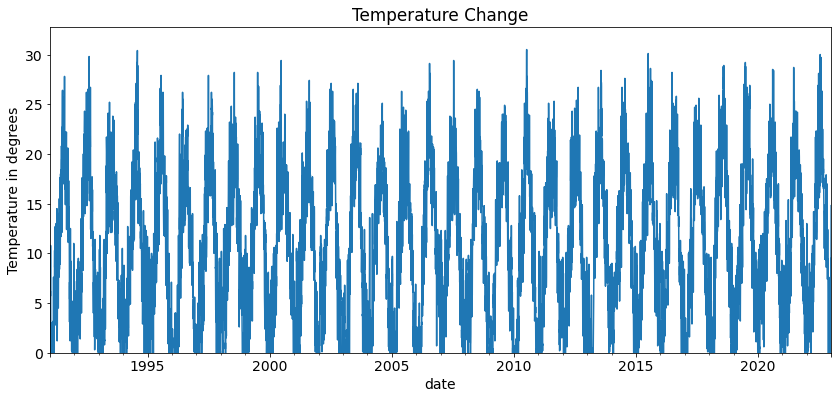

In [86]:
#temp1 = data[data['year'] == 1991 ]
plot_temp(data['temp']) 

In [87]:
data.head()

,temp,year,day,month
date,,,,
1991-01-01,4.6,1991,1,1
1991-01-02,5.8,1991,2,1
1991-01-03,7.0,1991,3,1
1991-01-04,7.0,1991,4,1
1991-01-05,4.7,1991,5,1


# Modeling the trend and Seasonality

In [88]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [89]:
data.head()

,temp,year,day,month
date,,,,
1991-01-01,4.6,1991,1,1
1991-01-02,5.8,1991,2,1
1991-01-03,7.0,1991,3,1
1991-01-04,7.0,1991,4,1
1991-01-05,4.7,1991,5,1


In [90]:
# Create a timestep column for the trend
data['timestep']=range(len(data))

In [91]:
#One Hot Encoding the month
month_dummies = pd.get_dummies(data['month'],
                              prefix="month",
                              drop_first=True)

#Join the dummies with the Original Data Frame
data = data.join(month_dummies)
data.head()

,temp,year,day,month,timestep,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
date,,,,,,,,,,,,,,,,
1991-01-01,4.6,1991,1,1,0,0,0,0,0,0,0,0,0,0,0,0
1991-01-02,5.8,1991,2,1,1,0,0,0,0,0,0,0,0,0,0,0
1991-01-03,7.0,1991,3,1,2,0,0,0,0,0,0,0,0,0,0,0
1991-01-04,7.0,1991,4,1,3,0,0,0,0,0,0,0,0,0,0,0
1991-01-05,4.7,1991,5,1,4,0,0,0,0,0,0,0,0,0,0,0


In [92]:
data.describe()

,temp,year,day,month,timestep,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
count,11688.000000,11688.000000,11688.000000,11688.000000,11688.000000,11688.000000,11688.000000,11688.000000,11688.000000,11688.000000,11688.000000,11688.000000,11688.000000,11688.000000,11688.000000,11688.000000
mean,10.450590,2006.499658,15.729637,6.522930,5843.500000,0.077344,0.084873,0.082136,0.084873,0.082136,0.084873,0.084873,0.082136,0.084873,0.082136,0.084873
std,7.864469,9.233451,8.800469,3.448851,3374.179308,0.267148,0.278705,0.274583,0.278705,0.274583,0.278705,0.278705,0.274583,0.278705,0.274583,0.278705
min,-15.600000,1991.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.500000,1998.750000,8.000000,4.000000,2921.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,10.400000,2006.500000,16.000000,7.000000,5843.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,16.725000,2014.250000,23.000000,10.000000,8765.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,30.500000,2022.000000,31.000000,12.000000,11687.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [93]:
# Define X and y
X = data.drop(columns=['temp', 'year', 'month','day'])
y = data['temp']

Xtrain = X[:-365]
Xtest  = X[-365:]
ytrain = y[:-365]
ytest  = y[-365:]

# Fit a new linear regression
m_trend_seasonal = LinearRegression()

m_trend_seasonal.fit(Xtrain,ytrain)



print("train score :", m_trend_seasonal.score(Xtrain, ytrain))
print("test score  :", m_trend_seasonal.score(Xtest, ytest))

#Detailed Summary of the Fitted Model
import statsmodels.api as sm

model = sm.OLS(ytrain, sm.add_constant(Xtrain)).fit()
#predictions = model.predict(Xtest) 

model.summary()

train score : 0.7520951689375888
test score  : 0.7683848417393806


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   temp   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     2859.
Date:                Fri, 10 Mar 2023   Prob (F-statistic):               0.00
Time:                        11:52:56   Log-Likelihood:                -31529.
No. Observations:               11323   AIC:                         6.308e+04
Df Residuals:                   11310   BIC:                         6.318e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4195      0.141      2.979      0.003       0.143       0.696
timestep       0.0001   1.13e-05     12.465      0.000       0.000       0.000
month_2        0.9254      0.183      5.053      0.000       0.566       1.284
month_3        3.9697      0.179     22.196      0.000       3.619       4.320
month_4        8.9684      0.180     49.733      0.000       8.615       9.322
month_5       13.4030      0.179     74.940      0.000      13.052      13.754
month_6       16.9396      0.180     93.934      0.000      16.586      17.293
month_7       18.9724      0.179    106.077      0.000      18.622      19.323
month_8       18.4734      0.179    103.284      0.000      18.123      18.824
month_9       14.0535      0.180     77.924      0.000      13.700      14.407
month_10       8.9852      0.179     50.233      0.000       8.635       9.336
month_11       4.1868      0.180     23.214      0.000       3.833       4.540
month_12       1.0133      0.179      5.664      0.000       0.663       1.364
==============================================================================
Omnibus:                       21.496   Durbin-Watson:                   0.379
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.338
Skew:                          -0.086   Prob(JB):                     1.41e-05
Kurtosis:                       3.134   Cond. No.                     8.07e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.07e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [94]:
# Create predictions with trend and seasonality
data['trend_seasonal'] = m_trend_seasonal.predict(X)

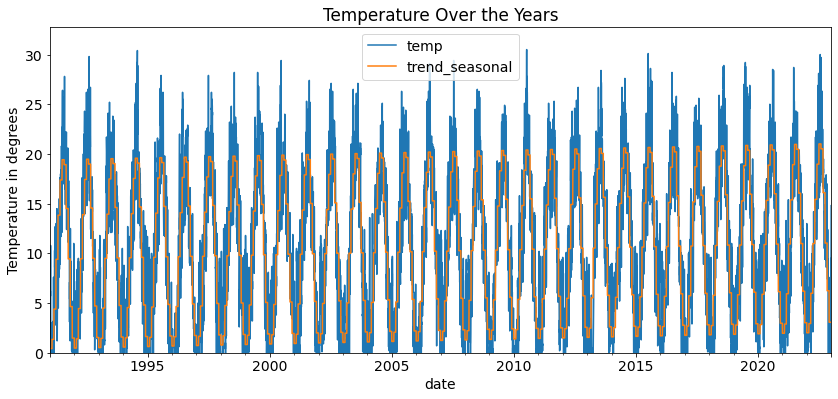

In [95]:
#Plot the Original data with the trend seasonal
plot_temp(data[['temp', 'trend_seasonal']], 'Temperature Over the Years')

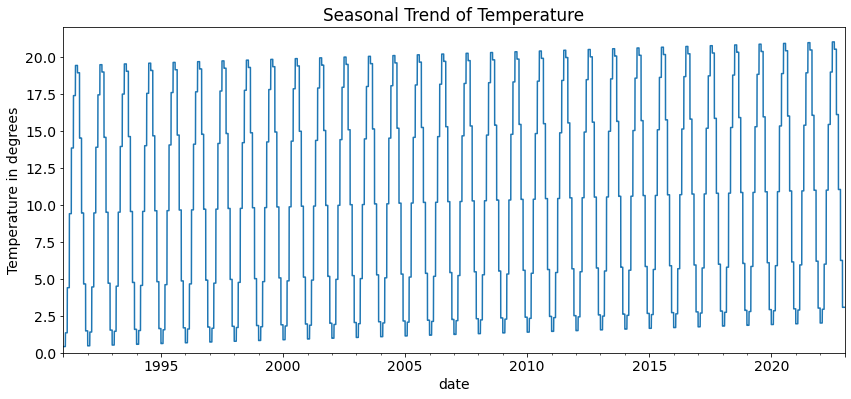

In [96]:
plot_temp(data['trend_seasonal'], "Seasonal Trend of Temperature")

# Check for Stationarity

In [97]:
from statsmodels.tsa.stattools import adfuller
dftest = adfuller(data['temp'], autolag = 'AIC')


In [98]:
val = '{:f}'.format(dftest[1])
print(f'1. ADF: {dftest[0]}')
print(f'2. P-Value: {val}  or {dftest[1]}')
print(f'3. No. of Lags: {dftest[2]}')
print(f'4. No. of Observations Used for ADF Regression and Critical Values Calculation: {dftest[3]}')
print(f'5. Critical Values:')
for key, val in dftest[4].items():
    print(f'\t {key} : {val}')

1. ADF: -7.004128764725278
2. P-Value: 0.000000  or 7.194940538858367e-10
3. No. of Lags: 19
4. No. of Observations Used for ADF Regression and Critical Values Calculation: 11668
5. Critical Values:
	 1% : -3.4309105707249774
	 5% : -2.8617877428151286
	 10% : -2.5669018684216587


<AxesSubplot:xlabel='date'>

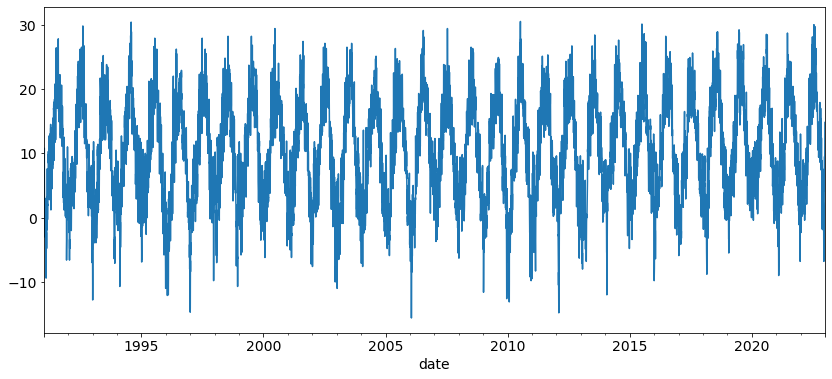

In [99]:

data['temp'].plot()

# Building a Model

## Estimating the Lags and checking stationarity on the remainder

In [100]:
data.head()

,temp,year,day,month,timestep,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,trend_seasonal
date,,,,,,,,,,,,,,,,,
1991-01-01,4.6,1991,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0.419504
1991-01-02,5.8,1991,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0.419644
1991-01-03,7.0,1991,3,1,2,0,0,0,0,0,0,0,0,0,0,0,0.419785
1991-01-04,7.0,1991,4,1,3,0,0,0,0,0,0,0,0,0,0,0,0.419925
1991-01-05,4.7,1991,5,1,4,0,0,0,0,0,0,0,0,0,0,0,0.420066


In [101]:
# Extract the Remainder to see if the model can be made better
data['remainder'] = data['temp'] - data['trend_seasonal']


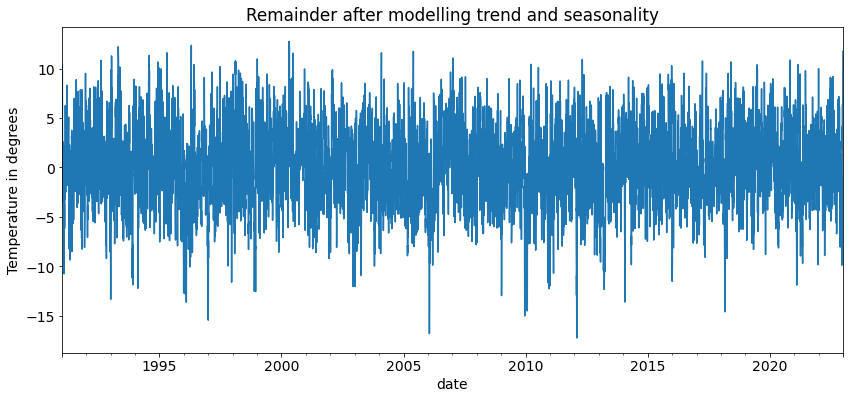

In [102]:
#Plot the Remainders
plot_temp(data['remainder'], 
             title='Remainder after modelling trend and seasonality', 
             ylim=False)

In [103]:
#Remai{mean}'nder of the mean
mean_remainder = data['remainder'].mean()
std_remainder = data['remainder'].std()

mean_temp = data['temp'].mean()
std_temp = data['temp'].std()


print(f'Mean  and Std of the Temperatures is {mean_temp} and {std_temp}')
print(f'Mean  and Std of the Remainder is {mean_remainder} and {std_remainder}')

Mean  and Std of the Temperatures is 10.450590349075934 and 7.864468859883023
Mean  and Std of the Remainder is 0.010711359846136881 and 3.910620627182876


In [104]:
data['lag1'] = data['remainder'].shift(1)
data.dropna(inplace=True)
data.head()

,temp,year,day,month,timestep,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,trend_seasonal,remainder,lag1
date,,,,,,,,,,,,,,,,,,,
1991-01-02,5.8,1991,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0.419644,5.380356,4.180496
1991-01-03,7.0,1991,3,1,2,0,0,0,0,0,0,0,0,0,0,0,0.419785,6.580215,5.380356
1991-01-04,7.0,1991,4,1,3,0,0,0,0,0,0,0,0,0,0,0,0.419925,6.580075,6.580215
1991-01-05,4.7,1991,5,1,4,0,0,0,0,0,0,0,0,0,0,0,0.420066,4.279934,6.580075
1991-01-06,6.0,1991,6,1,5,0,0,0,0,0,0,0,0,0,0,0,0.420206,5.579794,4.279934


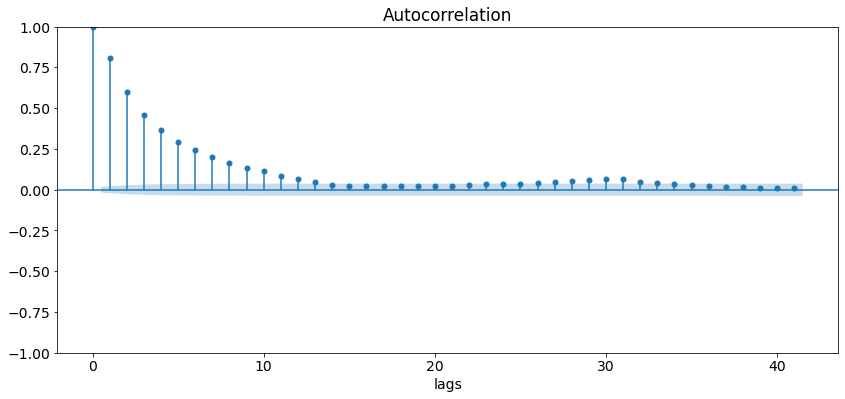

In [105]:
from statsmodels.tsa.ar_model import AutoReg, ar_select_order
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data['remainder'])
plt.xlabel('lags');

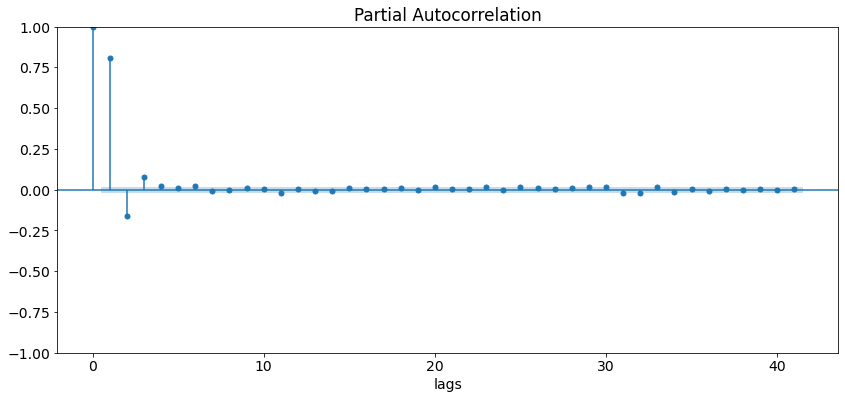

In [106]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data['remainder'])
plt.xlabel('lags');

In [107]:
#Estimate the Relevant Lags
selected_order = ar_select_order(data['remainder'], maxlag = 30)
selected_order.ar_lags

[1, 2, 3]

#### Checking Stationarity

In [108]:
from statsmodels.tsa.stattools import adfuller
dftest1 = adfuller(data['remainder'], autolag = 'AIC')

In [109]:
val = '{:f}'.format(dftest1[1])
print(f'1. ADF: {dftest1[0]}')
print(f'2. P-Value: {val}  or {dftest1[1]}')
print(f'3. No. of Lags: {dftest1[2]}')
print(f'4. No. of Observations Used for ADF Regression and Critical Values Calculation: {dftest[3]}')
print(f'5. Critical Values:')
for key, val in dftest1[4].items():
    print(f'\t {key} : {val}')

1. ADF: -28.52274711694639
2. P-Value: 0.000000  or 0.0
3. No. of Lags: 5
4. No. of Observations Used for ADF Regression and Critical Values Calculation: 11668
5. Critical Values:
	 1% : -3.4309099467183164
	 5% : -2.8617874670629586
	 10% : -2.566901721639927


## Model the trend, seasonality and lags

### Option 1:step by step(Using Linear Regression)

In [110]:
data.head()

,temp,year,day,month,timestep,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,trend_seasonal,remainder,lag1
date,,,,,,,,,,,,,,,,,,,
1991-01-02,5.8,1991,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0.419644,5.380356,4.180496
1991-01-03,7.0,1991,3,1,2,0,0,0,0,0,0,0,0,0,0,0,0.419785,6.580215,5.380356
1991-01-04,7.0,1991,4,1,3,0,0,0,0,0,0,0,0,0,0,0,0.419925,6.580075,6.580215
1991-01-05,4.7,1991,5,1,4,0,0,0,0,0,0,0,0,0,0,0,0.420066,4.279934,6.580075
1991-01-06,6.0,1991,6,1,5,0,0,0,0,0,0,0,0,0,0,0,0.420206,5.579794,4.279934


In [111]:
data.drop(columns=['trend_seasonal','remainder','lag1'], inplace = True)

In [112]:
data.head()

,temp,year,day,month,timestep,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
date,,,,,,,,,,,,,,,,
1991-01-02,5.8,1991,2,1,1,0,0,0,0,0,0,0,0,0,0,0
1991-01-03,7.0,1991,3,1,2,0,0,0,0,0,0,0,0,0,0,0
1991-01-04,7.0,1991,4,1,3,0,0,0,0,0,0,0,0,0,0,0
1991-01-05,4.7,1991,5,1,4,0,0,0,0,0,0,0,0,0,0,0
1991-01-06,6.0,1991,6,1,5,0,0,0,0,0,0,0,0,0,0,0


In [113]:
#Xtrain = Xtrain.drop(columns=['remainder'])

In [114]:
# Define X and y
X = data.drop(columns=['temp', 'year', 'month','day'])
y = data['temp']


#Split the training and the testing data
Xtrain = X[:-365]
Xtest  = X[-365:]
ytrain = y[:-365]
ytest  = y[-365:]


In [115]:
Xtrain.head()

,timestep,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
date,,,,,,,,,,,,
1991-01-02,1,0,0,0,0,0,0,0,0,0,0,0
1991-01-03,2,0,0,0,0,0,0,0,0,0,0,0
1991-01-04,3,0,0,0,0,0,0,0,0,0,0,0
1991-01-05,4,0,0,0,0,0,0,0,0,0,0,0
1991-01-06,5,0,0,0,0,0,0,0,0,0,0,0


In [116]:
#Generate 3 lags on the training data
Xtrain['trend_seasonal'] =  m_trend_seasonal.predict(Xtrain)
Xtrain['remainder'] = ytrain - Xtrain['trend_seasonal']
Xtrain['lag1'] = Xtrain['remainder'].shift(1)
Xtrain['lag2'] = Xtrain['remainder'].shift(2)
Xtrain['lag3'] = Xtrain['remainder'].shift(3)
Xtrain.fillna(method='bfill', inplace=True)
Xtrain.head()

,timestep,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,trend_seasonal,remainder,lag1,lag2,lag3
date,,,,,,,,,,,,,,,,,
1991-01-02,1,0,0,0,0,0,0,0,0,0,0,0,0.419644,5.380356,5.380356,5.380356,5.380356
1991-01-03,2,0,0,0,0,0,0,0,0,0,0,0,0.419785,6.580215,5.380356,5.380356,5.380356
1991-01-04,3,0,0,0,0,0,0,0,0,0,0,0,0.419925,6.580075,6.580215,5.380356,5.380356
1991-01-05,4,0,0,0,0,0,0,0,0,0,0,0,0.420066,4.279934,6.580075,6.580215,5.380356
1991-01-06,5,0,0,0,0,0,0,0,0,0,0,0,0.420206,5.579794,4.279934,6.580075,6.580215


In [117]:
# Fit a new linear regression model m_full
m_full = LinearRegression()

m_full.fit(Xtrain.drop(columns=['remainder']),ytrain)

# Create predictions with trend and seasonality
#trend_new = m_full.predict(X)

print("train score :", m_full.score(Xtrain.drop(columns=['remainder']), ytrain))



train score : 0.9176375345883793


In [118]:
#Generate 3 lags in the testing data
#Generate 3 lags on the training data
Xtest['trend_seasonal'] =  m_trend_seasonal.predict(Xtest)
Xtest['remainder'] = ytest - Xtest['trend_seasonal']

Xtest['lag1'] = Xtest['remainder'].shift(1)
Xtest['lag2'] = Xtest['remainder'].shift(2)
Xtest['lag3'] = Xtest['remainder'].shift(3)
Xtest.fillna(method='bfill', inplace=True)

Xtest.head()

,timestep,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,trend_seasonal,remainder,lag1,lag2,lag3
date,,,,,,,,,,,,,,,,,
2022-01-01,11323,0,0,0,0,0,0,0,0,0,0,0,2.011183,9.988817,9.988817,9.988817,9.988817
2022-01-02,11324,0,0,0,0,0,0,0,0,0,0,0,2.011323,7.888677,9.988817,9.988817,9.988817
2022-01-03,11325,0,0,0,0,0,0,0,0,0,0,0,2.011464,6.888536,7.888677,9.988817,9.988817
2022-01-04,11326,0,0,0,0,0,0,0,0,0,0,0,2.011604,4.388396,6.888536,7.888677,9.988817
2022-01-05,11327,0,0,0,0,0,0,0,0,0,0,0,2.011745,1.788255,4.388396,6.888536,7.888677


In [119]:
print("test score  :", m_full.score(Xtest.drop(columns=['remainder']), ytest))

#Detailed Summary of the Fitted Model
import statsmodels.api as sm

model = sm.OLS(ytrain, sm.add_constant(Xtrain.drop(columns=['remainder']))).fit()
#predictions = model.predict(Xtest) 

model.summary()

test score  : 0.9174557750038207


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   temp   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     8398.
Date:                Fri, 10 Mar 2023   Prob (F-statistic):               0.00
Time:                        11:53:01   Log-Likelihood:                -25289.
No. Observations:               11322   AIC:                         5.061e+04
Df Residuals:                   11306   BIC:                         5.073e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0003      0.083     -0.003      0.997      -0.163       0.163
timestep        8.972e-07   6.56e-06      0.137      0.891    -1.2e-05    1.38e-05
month_2            0.0617      0.102      0.602      0.547      -0.139       0.262
month_3            0.0338      0.090      0.377      0.706      -0.142       0.210
month_4            0.0335      0.077      0.435      0.664      -0.118       0.185
month_5           -0.0088      0.069     -0.129      0.898      -0.144       0.126
month_6           -0.0049      0.068     -0.072      0.942      -0.139       0.129
month_7            0.0388      0.068      0.567      0.571      -0.095       0.173
month_8           -0.0298      0.068     -0.438      0.661      -0.163       0.104
month_9            0.0199      0.069      0.288      0.774      -0.116       0.155
month_10           0.0244      0.076      0.321      0.749      -0.125       0.173
month_11          -0.0042      0.090     -0.046      0.963      -0.180       0.172
month_12           0.0424      0.100      0.426      0.670      -0.153       0.238
trend_seasonal     0.9979      0.005    183.553      0.000       0.987       1.009
lag1               0.9554      0.009    101.867      0.000       0.937       0.974
lag2              -0.2348      0.013    -18.348      0.000      -0.260      -0.210
lag3               0.0757      0.009      8.068      0.000       0.057       0.094
==============================================================================
Omnibus:                      159.876   Durbin-Watson:                   2.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              285.793
Skew:                          -0.074   Prob(JB):                     8.72e-63
Kurtosis:                       3.764   Cond. No.                     6.61e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.11e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

### Option 2(Using AutoRegression)

In [120]:
# Summary of the Auto Regressive Model
from statsmodels.tsa.ar_model import AutoReg

ar_model = AutoReg(endog=Xtrain['remainder'], lags=3).fit()
ar_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:              remainder   No. Observations:                11322
Model:                     AutoReg(3)   Log Likelihood              -25284.095
Method:               Conditional MLE   S.D. of innovations              2.259
Date:                Fri, 10 Mar 2023   AIC                          50578.189
Time:                        11:53:01   BIC                          50614.860
Sample:                    01-05-1991   HQIC                         50590.526
                         - 12-31-2021                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0002      0.021     -0.009      0.993      -0.042       0.041
remainder.L1     0.9554      0.009    101.916      0.000       0.937       0.974
remainder.L2    -0.2348      0.013    -18.356      0.000      -0.260      -0.210
remainder.L3     0.0753      0.009      8.030      0.000       0.057       0.094
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.2855           -0.0000j            1.2855           -0.0000
AR.2            0.9168           -3.0810j            3.2145           -0.2040
AR.3            0.9168           +3.0810j            3.2145            0.2040
-----------------------------------------------------------------------------
"""

In [121]:
Xtrain.shape, Xtest.shape

((11322, 17), (365, 17))

In [122]:
Xtrain.head()

,timestep,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,trend_seasonal,remainder,lag1,lag2,lag3
date,,,,,,,,,,,,,,,,,
1991-01-02,1,0,0,0,0,0,0,0,0,0,0,0,0.419644,5.380356,5.380356,5.380356,5.380356
1991-01-03,2,0,0,0,0,0,0,0,0,0,0,0,0.419785,6.580215,5.380356,5.380356,5.380356
1991-01-04,3,0,0,0,0,0,0,0,0,0,0,0,0.419925,6.580075,6.580215,5.380356,5.380356
1991-01-05,4,0,0,0,0,0,0,0,0,0,0,0,0.420066,4.279934,6.580075,6.580215,5.380356
1991-01-06,5,0,0,0,0,0,0,0,0,0,0,0,0.420206,5.579794,4.279934,6.580075,6.580215


In [123]:
Xtest.head()

,timestep,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,trend_seasonal,remainder,lag1,lag2,lag3
date,,,,,,,,,,,,,,,,,
2022-01-01,11323,0,0,0,0,0,0,0,0,0,0,0,2.011183,9.988817,9.988817,9.988817,9.988817
2022-01-02,11324,0,0,0,0,0,0,0,0,0,0,0,2.011323,7.888677,9.988817,9.988817,9.988817
2022-01-03,11325,0,0,0,0,0,0,0,0,0,0,0,2.011464,6.888536,7.888677,9.988817,9.988817
2022-01-04,11326,0,0,0,0,0,0,0,0,0,0,0,2.011604,4.388396,6.888536,7.888677,9.988817
2022-01-05,11327,0,0,0,0,0,0,0,0,0,0,0,2.011745,1.788255,4.388396,6.888536,7.888677


In [124]:
type(Xtest.index), type(Xtrain.index)

(pandas.core.indexes.datetimes.DatetimeIndex,
 pandas.core.indexes.datetimes.DatetimeIndex)

In [125]:
pred = m_full.predict(Xtest.drop(columns=['remainder']))
pred

array([ 9.97037978,  9.97052096,  7.9642175 ,  7.50205107,  5.18949609,
        3.21694204,  1.15432491,  1.09044826,  1.58431651,  1.59666522,
        3.12376151, -2.3959091 ,  2.05064863,  4.13870598,  4.53787527,
        1.3121202 ,  2.37740636,  3.98386282,  2.4784125 ,  3.84355687,
        0.75485127,  0.65178926,  3.31873584,  4.88598975,  4.43880257,
        3.40199143,  2.648828  ,  4.2418601 ,  4.28404277,  5.14004342,
        4.96655928,  3.24924284,  3.52390587,  4.83739285,  4.07079428,
        6.28462065,  3.75488058,  5.26690363,  3.46352445,  6.08134101,
        8.10275385,  6.1862382 ,  3.21556677,  1.39144174,  4.03840047,
        7.4741077 ,  6.14479193,  6.69085709,  7.20278384,  5.82747287,
        5.50945276,  5.00223556,  5.28126145,  5.28444067,  5.944895  ,
        5.2148694 ,  3.97571726,  3.99598273,  0.51352924,  5.49292803,
        2.41228814,  3.12416526,  0.53555931,  3.224556  ,  1.56328871,
        2.06024076,  4.15847423,  4.19915582,  5.37884634,  4.28

<AxesSubplot:xlabel='date'>

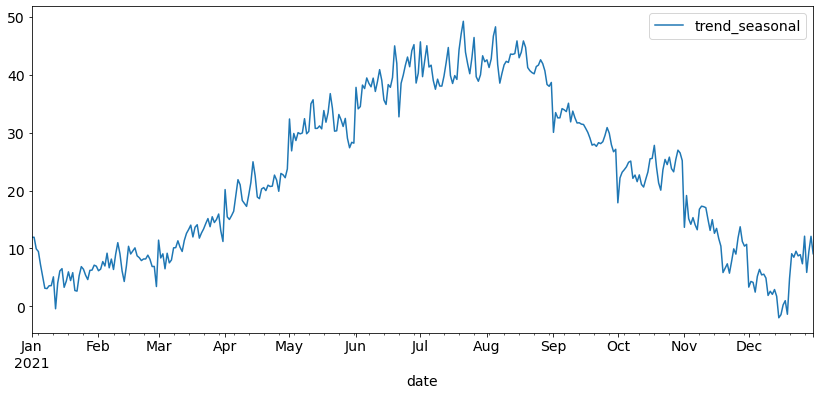

In [126]:
predict = Xtrain['trend_seasonal'].iloc[-365:] + pred
ar_predict = pd.DataFrame(data=predict)

ar_predict.plot()

In [127]:
ar_predict.reset_index(inplace=True)
ar_predict.head()

,date,trend_seasonal
0,2021-01-01,11.930254
1,2021-01-02,11.930536
2,2021-01-03,9.924373
3,2021-01-04,9.462347
4,2021-01-05,7.149933


In [128]:
ar_predict.rename(columns={'trend_seasonal':'predict'}, inplace=True)

In [129]:
ar_predict

,date,predict
0,2021-01-01,11.930254
1,2021-01-02,11.930536
2,2021-01-03,9.924373
3,2021-01-04,9.462347
4,2021-01-05,7.149933
...,...,...
360,2021-12-27,12.114128
361,2021-12-28,5.849337
362,2021-12-29,9.448721
363,2021-12-30,12.089437


In [130]:
data.head()

,temp,year,day,month,timestep,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
date,,,,,,,,,,,,,,,,
1991-01-02,5.8,1991,2,1,1,0,0,0,0,0,0,0,0,0,0,0
1991-01-03,7.0,1991,3,1,2,0,0,0,0,0,0,0,0,0,0,0
1991-01-04,7.0,1991,4,1,3,0,0,0,0,0,0,0,0,0,0,0
1991-01-05,4.7,1991,5,1,4,0,0,0,0,0,0,0,0,0,0,0
1991-01-06,6.0,1991,6,1,5,0,0,0,0,0,0,0,0,0,0,0


In [131]:
ar_predict

,date,predict
0,2021-01-01,11.930254
1,2021-01-02,11.930536
2,2021-01-03,9.924373
3,2021-01-04,9.462347
4,2021-01-05,7.149933
...,...,...
360,2021-12-27,12.114128
361,2021-12-28,5.849337
362,2021-12-29,9.448721
363,2021-12-30,12.089437


In [132]:
len(Xtrain), len(Xtest)

(11322, 365)

# Forecasting

In [136]:
#Forecasting the temperature for the next 7d days using the Model built
ar_forecast = ar_model.predict(start = len(Xtrain)+1, end = len(Xtrain)+len(Xtest)+7, dynamic = False)

ar_forecast

2022-01-02    5.932810
2022-01-03    4.500874
2022-01-04    3.521513
2022-01-05    2.753873
2022-01-06    2.142672
                ...   
2023-01-04   -0.000944
2023-01-05   -0.000944
2023-01-06   -0.000944
2023-01-07   -0.000944
2023-01-08   -0.000944
Freq: D, Length: 372, dtype: float64

In [137]:
ar_model.forecast(steps=2)

2022-01-01    8.167616
2022-01-02    5.932810
Freq: D, dtype: float64